In [1]:
#pip install yfinance
import requests
import pandas as pd
import numpy as np
import missingno
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import yfinance as yf

In [2]:
# Import csv of data
air_crash_data = pd.read_csv("crashes.csv")
air_crash_data.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn / ln,Total Aboard,Passengers Aboard,Crew Aboard,Total Fatalities,Passengers Fatalities,Crew Fatalities,Ground,Summary
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [3]:
# Get dimensions of the dataset
air_crash_data.shape

(4983, 17)

In [4]:
# Get dataset info
air_crash_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4983 entries, 0 to 4982
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4983 non-null   object 
 1   Time                   3444 non-null   object 
 2   Location               4978 non-null   object 
 3   Operator               4973 non-null   object 
 4   Flight #               1320 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC  Type               4969 non-null   object 
 7   Registration           4712 non-null   object 
 8   cn / ln                4320 non-null   object 
 9   Total Aboard           4966 non-null   float64
 10  Passengers Aboard      4760 non-null   float64
 11  Crew Aboard            4762 non-null   float64
 12  Total Fatalities       4975 non-null   float64
 13  Passengers Fatalities  4746 non-null   float64
 14  Crew Fatalities        4746 non-null   float64
 15  Grou

In [5]:
# Get overall summary statistics of numeric variables
air_crash_data.describe()

,Total Aboard,Passengers Aboard,Crew Aboard,Total Fatalities,Passengers Fatalities,Crew Fatalities,Ground
count,4966.000000,4760.000000,4762.00000,4975.000000,4746.000000,4746.000000,4941.000000
mean,31.126460,26.919538,4.47942,22.305528,18.974083,3.576907,1.724145
std,45.490525,44.048685,3.48979,35.048526,34.118481,3.168683,55.624444
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,2.00000,4.000000,1.000000,2.000000,0.000000
50%,16.000000,12.000000,4.00000,11.000000,8.000000,3.000000,0.000000
75%,35.000000,30.000000,6.00000,25.000000,21.000000,5.000000,0.000000
max,644.000000,614.000000,61.00000,583.000000,560.000000,46.000000,2750.000000


<AxesSubplot:>

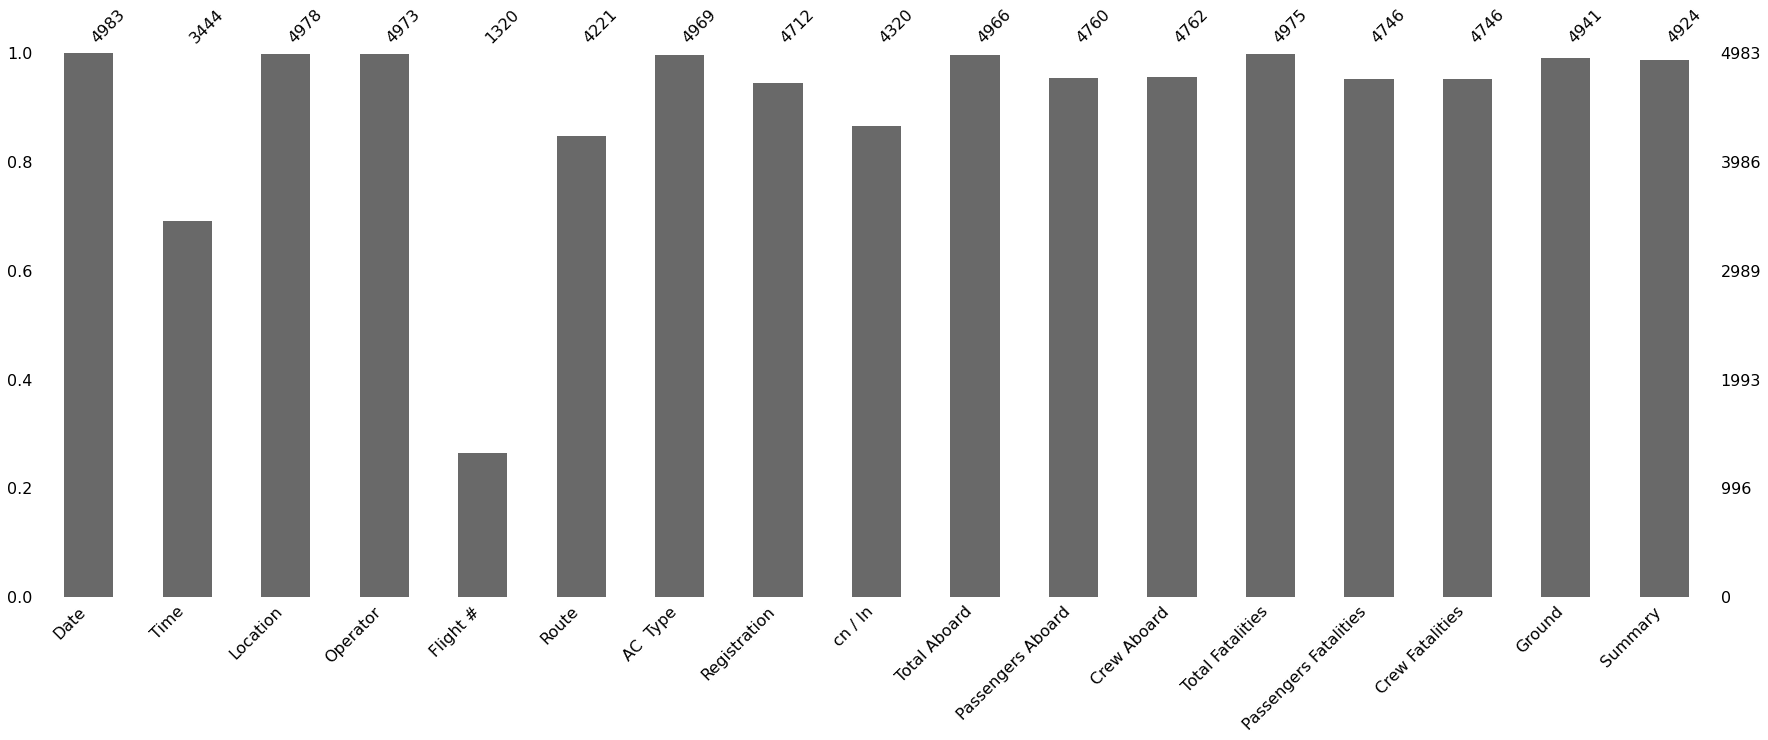

In [6]:
# PLot graphic of missing values
missingno.bar(air_crash_data, figsize = (30,10))


In [7]:
# Get the number of missing values for each column
air_crash_data.isnull().sum()

Date                        0
Time                     1539
Location                    5
Operator                   10
Flight #                 3663
Route                     762
AC  Type                   14
Registration              271
cn / ln                   663
Total Aboard               17
Passengers Aboard         223
Crew Aboard               221
Total Fatalities            8
Passengers Fatalities     237
Crew Fatalities           237
Ground                     42
Summary                    59
dtype: int64

In [8]:
# Remove rows that have missing values in all columns
air_crash_data.dropna(how="all")

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn / ln,Total Aboard,Passengers Aboard,Crew Aboard,Total Fatalities,Passengers Fatalities,Crew Fatalities,Ground,Summary
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,"December 27, 2019",07:22,"Almaty, Kazakhstan",Bek Air,Z92100,Almaty - Nursultan Nazabavev,Fokker 100,UP-F100,11496,98.0,95.0,3.0,12.0,NaN,NaN,0.0,"While taking off, the tail of the plane struck..."
4979,"January 02, 2020",NaN,"Geneina, Sudan",Sudanese Air Force,NaN,Geneina - Khartoum,Antonov An12-A,NaN,2340606,18.0,9.0,9.0,18.0,9.0,9.0,NaN,The aircraft crashed shortly after taking off ...
4980,"January 08, 2020",06:18,"Near Shahriah, Iran",Ukraine International Airlines,PS752,Tehran - Kiev,Boeing 737-8KV WL,UR-PSR,38124/5977,176.0,167.0,9.0,176.0,167.0,9.0,0.0,The plane took off from Tehran International A...
4981,"February 05, 2020",18:19,"Istanbul, Turkey",Pegasus Airlines,PC2193,Izmir - Istanbul,Boeing 737-86J,TC-IZK,37742,177.0,171.0,6.0,3.0,3.0,0.0,0.0,While landing duriing high winds and heavey ra...


In [9]:
# filling a null values using fillna() for specific variables
char_var = ['Location','Operator','Flight #','Route','AC  Type','Registration','cn / ln','Summary']
# Loop through each var in the list and replace missing value with Unknown "var" string
for i in char_var:
    air_crash_data[i].fillna("Unknown " + i , inplace = True) 
# Get the number of missing values for each column
air_crash_data.isnull().sum()

Date                        0
Time                     1539
Location                    0
Operator                    0
Flight #                    0
Route                       0
AC  Type                    0
Registration                0
cn / ln                     0
Total Aboard               17
Passengers Aboard         223
Crew Aboard               221
Total Fatalities            8
Passengers Fatalities     237
Crew Fatalities           237
Ground                     42
Summary                     0
dtype: int64

In [10]:
# Check varaibles Aboard and Fatalities where value is 0
def check_vars(var):
    check_var = air_crash_data[var].isna()
    return air_crash_data.loc[check_var, : ]
check_vars("Total Aboard")

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn / ln,Total Aboard,Passengers Aboard,Crew Aboard,Total Fatalities,Passengers Fatalities,Crew Fatalities,Ground,Summary
26,"July 21, 1919",16:55,"Chicago, Illinois",Wingfoot Air Express Goodyear Tire,Unknown Flight #,Shuttle,FD Type Dirigible,Unknown Registration,Unknown cn / ln,NaN,NaN,NaN,3.0,2.0,1.0,10.0,"The dirigible, cruising at 1,200 ft. caught fi..."
103,"September 07, 1925",NaN,"Toul, France",CIDNA,Unknown Flight #,Unknown Route,Spad 33,Unknown Registration,Unknown cn / ln,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown Summary
347,"August 10, 1934",NaN,"Ningbo, China",China National Aviation Corporation,Unknown Flight #,Unknown Route,Sikorsky S-38B,Unknown Registration,Unknown cn / ln,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown Summary
383,"August 13, 1935",NaN,"Hangow, China",China National Aviation Corporation,Unknown Flight #,Unknown Route,Sikorsky S-38B,NV40V,Unknown cn / ln,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Destoryed in a storm.
450,"December 26, 1936",NaN,"Nanking, China",China National Aviation Corporation,Unknown Flight #,Unknown Route,Douglas DC-2,NC14269,Unknown cn / ln,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown Summary
651,"October 01, 1942",NaN,"Kunming, China",China National Aviation Corporation,Unknown Flight #,Unknown Route,Douglas C-47,69,Unknown cn / ln,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crashed while attempting to land after losing ...
753,"November 09, 1944",NaN,"Seljord, Norway",Military - U.S. Army Air Corps,Unknown Flight #,Unknown Route,Unknown AC Type,42-52196,Unknown cn / ln,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown Summary
852,"March 18, 1946",NaN,"Between Chungking and Shanghai, China",China National Aviation Corporation,Unknown Flight #,Chunking - Shanghai,Unknown AC Type,139,Unknown cn / ln,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Disappeared while en route. Plane never located.
1226,"January 20, 1951",NaN,"Huilyo, Peru",Military - TAM,Unknown Flight #,Unknown Route,Douglas DC-3,Unknown Registration,Unknown cn / ln,NaN,NaN,NaN,16.0,NaN,NaN,NaN,Unknown Summary
1357,"December 22, 1952",NaN,"Damascus, Syria",Syrian Air,Unknown Flight #,Unknown Route,Douglas DC-3,Unknown Registration,Unknown cn / ln,NaN,NaN,NaN,9.0,NaN,NaN,NaN,Unknown Summary


In [11]:
check_vars("Total Fatalities")

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn / ln,Total Aboard,Passengers Aboard,Crew Aboard,Total Fatalities,Passengers Fatalities,Crew Fatalities,Ground,Summary
103,"September 07, 1925",NaN,"Toul, France",CIDNA,Unknown Flight #,Unknown Route,Spad 33,Unknown Registration,Unknown cn / ln,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown Summary
347,"August 10, 1934",NaN,"Ningbo, China",China National Aviation Corporation,Unknown Flight #,Unknown Route,Sikorsky S-38B,Unknown Registration,Unknown cn / ln,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown Summary
383,"August 13, 1935",NaN,"Hangow, China",China National Aviation Corporation,Unknown Flight #,Unknown Route,Sikorsky S-38B,NV40V,Unknown cn / ln,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Destoryed in a storm.
450,"December 26, 1936",NaN,"Nanking, China",China National Aviation Corporation,Unknown Flight #,Unknown Route,Douglas DC-2,NC14269,Unknown cn / ln,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown Summary
651,"October 01, 1942",NaN,"Kunming, China",China National Aviation Corporation,Unknown Flight #,Unknown Route,Douglas C-47,69,Unknown cn / ln,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crashed while attempting to land after losing ...
753,"November 09, 1944",NaN,"Seljord, Norway",Military - U.S. Army Air Corps,Unknown Flight #,Unknown Route,Unknown AC Type,42-52196,Unknown cn / ln,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown Summary
852,"March 18, 1946",NaN,"Between Chungking and Shanghai, China",China National Aviation Corporation,Unknown Flight #,Chunking - Shanghai,Unknown AC Type,139,Unknown cn / ln,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Disappeared while en route. Plane never located.
1445,"March 13, 1954",NaN,"Dien Bien Phu, South Vietnam",Aigle Azur,Unknown Flight #,Unknown Route,C-46,Unknown Registration,Unknown cn / ln,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shot down.


In [12]:
# Creates a functions that imputes the missing value (imp_var) by the mean of another variable (by_var) and replaces the the remaining values as 0
def impute_data(df, imp_var, by_var):
    df[imp_var] = df[imp_var].fillna(df.groupby(by_var)[imp_var].transform('mean'))
    df[imp_var].fillna(0, inplace=True)
    return df

In [13]:
# filling a null values using fillna() for specific variables
num_var = ['Total Aboard','Passengers Aboard','Crew Aboard','Total Fatalities','Passengers Fatalities','Crew Fatalities','Ground']
# Loop through each var in the list and replace missing value with No "var" string
for i in num_var:
    impute_data(air_crash_data,str(i),'AC  Type')

# Get the number of missing values for each column
air_crash_data.isnull().sum()

Date                        0
Time                     1539
Location                    0
Operator                    0
Flight #                    0
Route                       0
AC  Type                    0
Registration                0
cn / ln                     0
Total Aboard                0
Passengers Aboard           0
Crew Aboard                 0
Total Fatalities            0
Passengers Fatalities       0
Crew Fatalities             0
Ground                      0
Summary                     0
dtype: int64

In [14]:
# Check for duplicates
air_crash_data[air_crash_data.duplicated(['Date','AC  Type','Registration','cn / ln'], keep=False)]

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn / ln,Total Aboard,Passengers Aboard,Crew Aboard,Total Fatalities,Passengers Fatalities,Crew Fatalities,Ground,Summary


In [15]:
# Use the datetime package to create the datetime variable
air_crash_data["datetime"] = pd.to_datetime(air_crash_data['Date'], format='%B %d, %Y')
air_crash_data.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn / ln,Total Aboard,Passengers Aboard,Crew Aboard,Total Fatalities,Passengers Fatalities,Crew Fatalities,Ground,Summary,datetime
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,Unknown Flight #,Demonstration,Wright Flyer III,Unknown Registration,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908-09-17
1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",Unknown Operator,Unknown Flight #,Air show,Wright Byplane,SC1,Unknown cn / ln,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,1909-09-07
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,Unknown Flight #,Test flight,Dirigible,Unknown Registration,Unknown cn / ln,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912-07-12
3,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,Unknown Flight #,Unknown Route,Curtiss seaplane,Unknown Registration,Unknown cn / ln,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913-08-06
4,"September 09, 1913",18:30,Over the North Sea,Military - German Navy,Unknown Flight #,Unknown Route,Zeppelin L-1 (airship),Unknown Registration,Unknown cn / ln,20.0,0.0,0.0,14.0,0.0,0.0,0.0,The airship flew into a thunderstorm and encou...,1913-09-09


In [16]:
# Create new variables for Day, Month, Year and Day of the week
air_crash_data['Day'] = air_crash_data['datetime'].dt.day
air_crash_data['Month'] = air_crash_data['datetime'].dt.month
air_crash_data['Year'] = air_crash_data['datetime'].dt.year
air_crash_data['WeekDay'] = air_crash_data['datetime'].dt.weekday
air_crash_data.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn / ln,Total Aboard,...,Total Fatalities,Passengers Fatalities,Crew Fatalities,Ground,Summary,datetime,Day,Month,Year,WeekDay
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,Unknown Flight #,Demonstration,Wright Flyer III,Unknown Registration,1,2.0,...,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908-09-17,17,9,1908,3
1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",Unknown Operator,Unknown Flight #,Air show,Wright Byplane,SC1,Unknown cn / ln,1.0,...,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,1909-09-07,7,9,1909,1
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,Unknown Flight #,Test flight,Dirigible,Unknown Registration,Unknown cn / ln,5.0,...,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912-07-12,12,7,1912,4
3,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,Unknown Flight #,Unknown Route,Curtiss seaplane,Unknown Registration,Unknown cn / ln,1.0,...,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913-08-06,6,8,1913,2
4,"September 09, 1913",18:30,Over the North Sea,Military - German Navy,Unknown Flight #,Unknown Route,Zeppelin L-1 (airship),Unknown Registration,Unknown cn / ln,20.0,...,14.0,0.0,0.0,0.0,The airship flew into a thunderstorm and encou...,1913-09-09,9,9,1913,1


In [17]:
# Use Regular expressions to extract the Manufacturer from the Aircraft Type variable
air_crash_data['Manufacturer'] = air_crash_data['AC  Type'].str.extract('([A-Za-z]*)', expand=True)

# Calculate the percentage on board that were fatalities
air_crash_data['fatal_on_board'] = (air_crash_data['Total Fatalities'] / air_crash_data['Total Aboard'] *100).round(1)
air_crash_data['fatal_on_board'].fillna(0, inplace=True)
air_crash_data.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn / ln,Total Aboard,...,Crew Fatalities,Ground,Summary,datetime,Day,Month,Year,WeekDay,Manufacturer,fatal_on_board
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,Unknown Flight #,Demonstration,Wright Flyer III,Unknown Registration,1,2.0,...,0.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908-09-17,17,9,1908,3,Wright,50.0
1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",Unknown Operator,Unknown Flight #,Air show,Wright Byplane,SC1,Unknown cn / ln,1.0,...,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,1909-09-07,7,9,1909,1,Wright,100.0
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,Unknown Flight #,Test flight,Dirigible,Unknown Registration,Unknown cn / ln,5.0,...,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912-07-12,12,7,1912,4,Dirigible,100.0
3,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,Unknown Flight #,Unknown Route,Curtiss seaplane,Unknown Registration,Unknown cn / ln,1.0,...,1.0,0.0,The first fatal airplane accident in Canada oc...,1913-08-06,6,8,1913,2,Curtiss,100.0
4,"September 09, 1913",18:30,Over the North Sea,Military - German Navy,Unknown Flight #,Unknown Route,Zeppelin L-1 (airship),Unknown Registration,Unknown cn / ln,20.0,...,0.0,0.0,The airship flew into a thunderstorm and encou...,1913-09-09,9,9,1913,1,Zeppelin,70.0


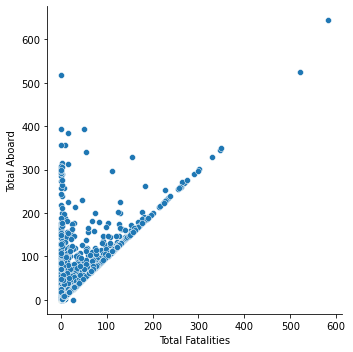

In [18]:
# PLot the relationship between Total Fatalities and those on Board
sns.relplot(x="Total Fatalities", y="Total Aboard", data=air_crash_data)

In [19]:
# Create function that gets the count of crashes by a selected catgorical variable and the sum of Total Aboard and Fatalities
def tabulate_data(by_var):
    df1 = air_crash_data[[str(by_var)]].groupby([str(by_var)]).size().reset_index(name='Crashes')
    df2 = air_crash_data[['Total Aboard','Total Fatalities',str(by_var)]].groupby([str(by_var)]).sum()
    df = df1.merge(df2, left_on=str(by_var), right_on=str(by_var))
    return df

In [23]:
# Tabulate the number of crashes, the sum of those aboard and fatalities
ac_type = tabulate_data('AC  Type')

# Calcualte the fatalities per crash
ac_type['fatal_per_crash'] = ac_type['Total Fatalities'] / ac_type['Crashes']

# Calculate the percentage of those on board that were fatal
ac_type['fatal_on_board'] = ac_type['Total Fatalities'] / ac_type['Total Aboard'] *100

# Sort the descending Fatalities
ac_type = ac_type.sort_values(by='Total Fatalities',ascending=False)
ac_type.head()

,AC Type,Crashes,Total Aboard,Total Fatalities,fatal_per_crash,fatal_on_board
1113,Douglas DC-3,333,6238.200000,4725.000000,14.189189,75.743003
1015,Douglas C-47,64,1165.206349,1075.809524,16.809524,92.327812
1182,Douglas DC-6B,27,1323.000000,1051.000000,38.925926,79.440665
142,Antonov AN-26,35,1134.000000,1038.000000,29.657143,91.534392
1529,Ilyushin IL-18B,15,1236.000000,1008.000000,67.200000,81.553398


Text(0.5, 1.0, 'Figure 1 Type of aircraft with most accidents, 1908-2020')

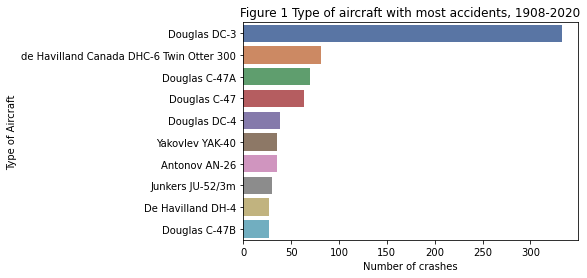

In [21]:
# Create a countplot show the number of crashes by type of aircraft
fig1_1 = sns.countplot(y="AC  Type", palette="deep",  data=air_crash_data,order=air_crash_data["AC  Type"].value_counts().iloc[:10].index)
fig1_1.set_xlabel('Number of crashes')
fig1_1.set_ylabel('Type of Aircraft')
fig1_1.set_title('Figure 1 Type of aircraft with most accidents, 1908-2020')

Text(0.5, 1.0, 'Most fatalities by type of aircraft, 1908-2020')

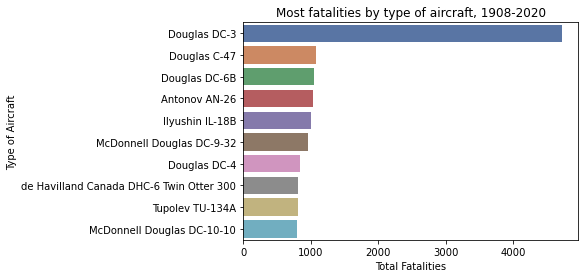

In [24]:
# Create a countplot show the number of fatalities by type of aircraft
fig1_2 = sns.barplot(y='AC  Type', palette="deep",  x="Total Fatalities", ci=None, data=ac_type.iloc[:10])
fig1_2.set_xlabel('Total Fatalities')
fig1_2.set_ylabel('Type of Aircraft')
fig1_2.set_title('Most fatalities by type of aircraft, 1908-2020')

Text(0.5, 1.0, 'Figure 2 Type of aircraft with most accidents, 1970-2020')

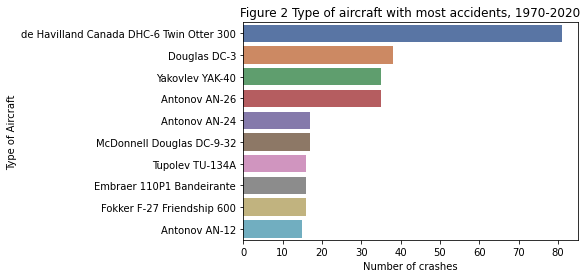

In [26]:
# Get the number of crashes post 1970
post1970 = air_crash_data.loc[(air_crash_data['Year']>=1970)]
fig1_3 = sns.countplot(y="AC  Type", palette="deep",  data=post1970,order=post1970["AC  Type"].value_counts().iloc[:10].index)
fig1_3.set_xlabel('Number of crashes')
fig1_3.set_ylabel('Type of Aircraft')
fig1_3.set_title('Figure 2 Type of aircraft with most accidents, 1970-2020')

In [27]:
# Tabulate the number of crashes, the sum of those aboard and fatalities
manufacturer = tabulate_data('Manufacturer')

# Calcualte the fatalities per crash
manufacturer['fatal_per_crash'] = manufacturer['Total Fatalities'] / manufacturer['Crashes']

# Calculate the percentage of those on board that were fatal
manufacturer['fatal_on_board'] = manufacturer['Total Fatalities'] / manufacturer['Total Aboard'] *100

# Sort the descending Fatalities
manufacturer = manufacturer.sort_values(by='Total Fatalities',ascending=False)
manufacturer.head()

,Manufacturer,Crashes,Total Aboard,Total Fatalities,fatal_per_crash,fatal_on_board
38,Boeing,406,33249.333333,20487.00000,50.460591,61.616273
81,Douglas,987,20815.315440,16542.17316,16.760054,79.471163
151,Lockheed,324,9936.000000,7763.00000,23.959877,78.130032
161,McDonnell,127,13209.000000,7122.00000,56.078740,53.917783
16,Antonov,282,7779.000000,6508.00000,23.078014,83.661139


Text(0.5, 1.0, 'Most crashes by aircraft manufacturer, 1908-2020')

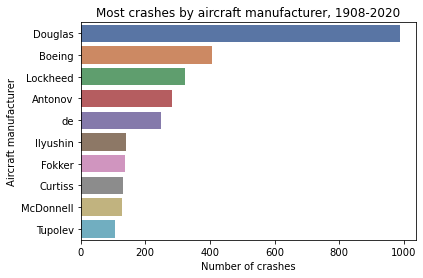

In [28]:
# Create a countplot show the number of crashes by Manufacturer
fig2_1 = sns.countplot(y="Manufacturer", palette="deep",  data=air_crash_data,order=air_crash_data["Manufacturer"].value_counts().iloc[:10].index)
fig2_1.set_xlabel('Number of crashes')
fig2_1.set_ylabel('Aircraft manufacturer')
fig2_1.set_title('Most crashes by aircraft manufacturer, 1908-2020')

Text(0.5, 1.0, 'Most fatalities by aircraft manufacturer, 1908-2020')

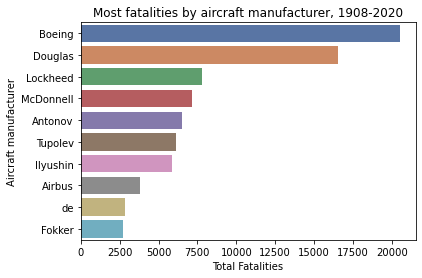

In [29]:
# Create a countplot show the number of fatalities by type of aircraft
fig2_2 = sns.barplot(y='Manufacturer', palette="deep",  x="Total Fatalities", ci=None, data=manufacturer.iloc[:10])
fig2_2.set_xlabel('Total Fatalities')
fig2_2.set_ylabel('Aircraft manufacturer')
fig2_2.set_title('Most fatalities by aircraft manufacturer, 1908-2020')

Text(0.5, 1.0, 'Most crashes by aircraft manufacturer, 1970-2020')

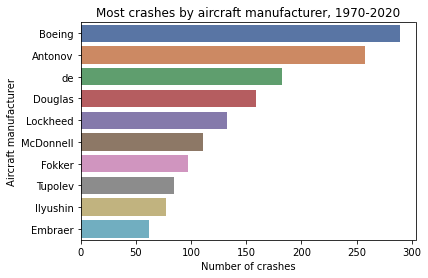

In [30]:
# Plot number of crashes post 1970
fig2_3 = sns.countplot(y="Manufacturer", palette="deep",  data=post1970,order=post1970["Manufacturer"].value_counts().iloc[:10].index)
fig2_3.set_xlabel('Number of crashes')
fig2_3.set_ylabel('Aircraft manufacturer')
fig2_3.set_title('Most crashes by aircraft manufacturer, 1970-2020')

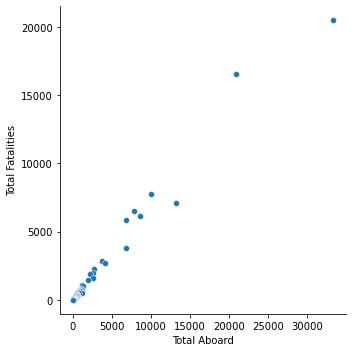

In [31]:
sns.relplot(x="Total Aboard", y="Total Fatalities", palette="deep", data=manufacturer)

In [32]:
# Tabulate the number of crashes, the sum of those aboard and fatalities
operator = tabulate_data('Operator')

# Calcualte the fatalities per crash
operator['fatal_per_crash'] = operator['Total Fatalities'] / operator['Crashes']

# Calculate the percentage of those on board that were fatal
operator['fatal_on_board'] = operator['Total Fatalities'] / operator['Total Aboard'] *100

# Sort the descending Fatalities
operator = operator.sort_values(by='Total Fatalities',ascending=False)
operator.head()

,Operator,Crashes,Total Aboard,Total Fatalities,fatal_per_crash,fatal_on_board
81,Aeroflot,255,11332.0,8858.0,34.737255,78.168020
1389,Military - U.S. Air Force,141,4113.0,3395.0,24.078014,82.543156
188,Air France,71,2866.0,1717.0,24.183099,59.909281
352,American Airlines,37,2122.0,1422.0,38.432432,67.012253
1581,Pan American World Airways,41,3097.0,1303.0,31.780488,42.072974


Text(0.5, 1.0, 'Aircraft operator with most accidents, 1908-2020')

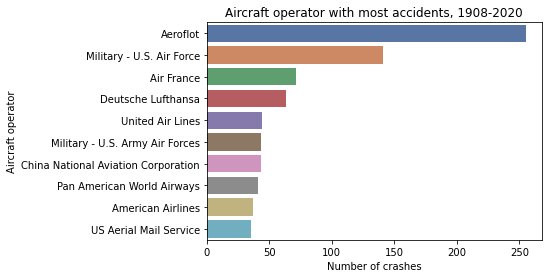

In [33]:
# Create a countplot of the number of crashes by aircraft operator
fig3_1 = sns.countplot(y="Operator", palette="deep",  data=air_crash_data,order=air_crash_data["Operator"].value_counts().iloc[:10].index)
fig3_1.set_xlabel('Number of crashes')
fig3_1.set_ylabel('Aircraft operator')
fig3_1.set_title('Aircraft operator with most accidents, 1908-2020')

Text(0.5, 1.0, 'Figure 3 Total fatalities by aircraft operator, 1908-2020')

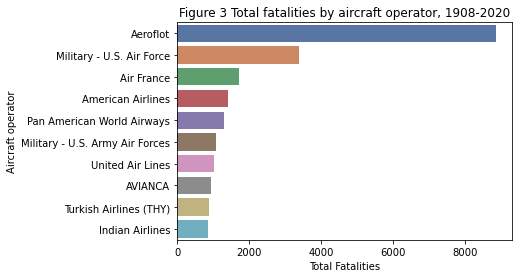

In [34]:
# Plot the total number of fatalities by aircraft operator
fig3_2 = sns.barplot(y='Operator', palette="deep",  x="Total Fatalities", ci=None, data=operator.iloc[:10])
fig3_2.set_xlabel('Total Fatalities')
fig3_2.set_ylabel('Aircraft operator')
fig3_2.set_title('Figure 3 Total fatalities by aircraft operator, 1908-2020')

Text(0.5, 1.0, 'Most crashes by aircraft operator, 1970-2020')

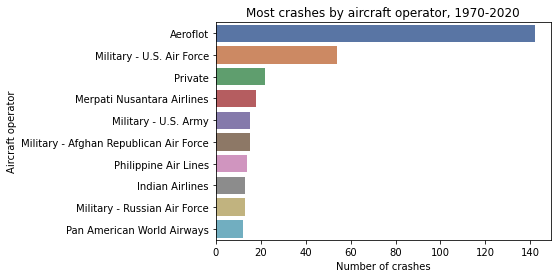

In [35]:
# Create count plot on the number of crashes by operator porst 1970
fig3_3 = sns.countplot(y="Operator", palette="deep",  data=post1970,order=post1970["Operator"].value_counts().iloc[:10].index)
fig3_3.set_xlabel('Number of crashes')
fig3_3.set_ylabel('Aircraft operator')
fig3_3.set_title('Most crashes by aircraft operator, 1970-2020')

In [36]:
# Tabulate the number of crashes and sum the total aboard and fatalities by location of crash
location = tabulate_data('Location')

# Calculate the fatalities per crash for each location
location['fatal_per_crash'] = location['Total Fatalities'] / location['Crashes']

# Get the percentage of those on board that were fatalities
location['fatal_on_board'] = location['Total Fatalities'] / location['Total Aboard'] *100

# Sort the by descending fatalities
location = location.sort_values(by='Total Fatalities',ascending=False)
location.head()

,Location,Crashes,Total Aboard,Total Fatalities,fatal_per_crash,fatal_on_board
3849,"Tenerife, Canary Islands",4,977.0,916.0,229.000000,93.756397
1612,"Mt. Osutaka, near Ueno Village, Japan",1,524.0,520.0,520.000000,99.236641
1548,"Moscow, Russia",17,833.0,428.0,25.176471,51.380552
3803,"Taipei, Taiwan",7,554.0,370.0,52.857143,66.787004
3624,"Sao Paulo, Brazil",13,504.0,350.0,26.923077,69.444444


Text(0.5, 1.0, 'Figure 4 Location with most accidents, 1908-2020')

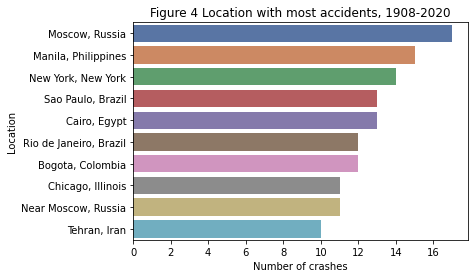

In [38]:
# Create countplot for the number of crashes by location of crash
fig4_1 = sns.countplot(y="Location", palette="deep",  data=air_crash_data,order=air_crash_data["Location"].value_counts().iloc[:10].index)
fig4_1.set_xlabel('Number of crashes')
fig4_1.set_ylabel('Location')
fig4_1.set_title('Figure 4 Location with most accidents, 1908-2020')

Text(0.5, 1.0, 'Most fatalities by location of crash, 1908-2020')

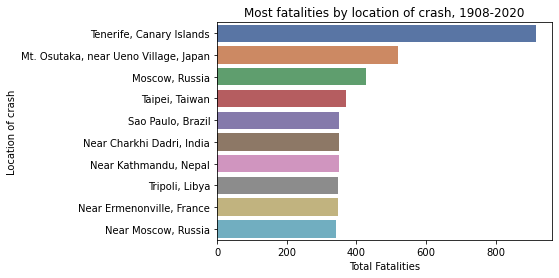

In [39]:
# Create plot of the number of fatalities by location of crashes
fig4_2 = sns.barplot(y='Location', x="Total Fatalities", palette="deep", ci=None, data=location.iloc[:10])
fig4_2.set_xlabel('Total Fatalities')
fig4_2.set_ylabel('Location of crash')
fig4_2.set_title('Most fatalities by location of crash, 1908-2020')

Text(0.5, 1.0, 'Most crashes by location, 1970-2020')

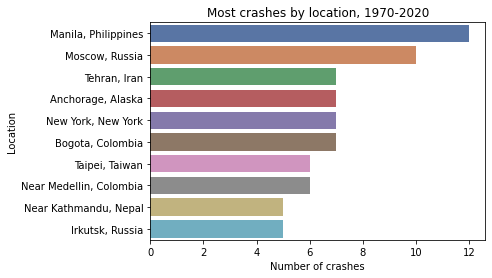

In [40]:
# Create countplot of number of crashes since 1970
fig4_3 = sns.countplot(y="Location", palette="deep", data=post1970,order=post1970["Location"].value_counts().iloc[:10].index)
fig4_3.set_xlabel('Number of crashes')
fig4_3.set_ylabel('Location')
fig4_3.set_title('Most crashes by location, 1970-2020')

In [41]:
# Tabulate the number of crashes and sum total aboard and fatalities by day of the week
weekday_crashes = tabulate_data('WeekDay')
weekday_crashes

,WeekDay,Crashes,Total Aboard,Total Fatalities
0,0,672,21116.983333,15187.000000
1,1,757,24044.000000,16139.000000
2,2,752,23262.733333,17256.000000
3,3,749,22265.789683,15532.809524
4,4,742,23350.000000,15881.000000
5,5,717,20409.642424,14977.363636
6,6,594,20595.000000,16047.000000


<AxesSubplot:title={'center':'Figure 5 Number of accidents by day of the week, 1908-2019'}, xlabel='Day of the Week', ylabel='Crashes'>

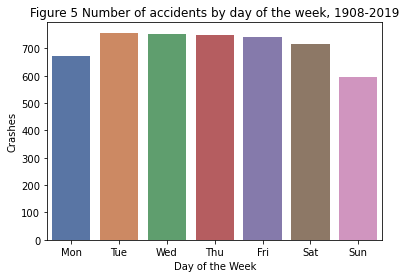

In [43]:
# Visualise the number of crashes and total fatalities
fig5_1 = sns.barplot(x='WeekDay',y='Crashes',palette="deep",ci=None, data=weekday_crashes)
fig5_1.set_xticks(range(len(weekday_crashes)))
fig5_1.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
fig5_1.set_xlabel('Day of the Week')
fig5_1.set_title('Figure 5 Number of accidents by day of the week, 1908-2019')
fig5_1

<AxesSubplot:title={'center':'Total fatalities from air crashes by day of the week, 1908-2019'}, xlabel='Day of the Week', ylabel='Total Fatalities'>

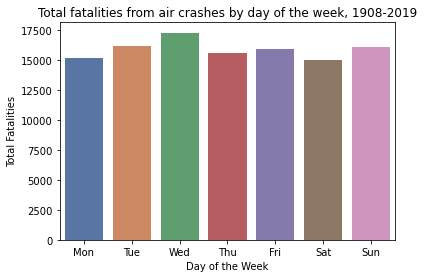

In [44]:
# Plot the number of fatalities by day of the week
fig5_2 = sns.barplot(x='WeekDay',y='Total Fatalities',palette="deep",ci=None, data=weekday_crashes)
fig5_2.set_xticks(range(len(weekday_crashes)))
fig5_2.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
fig5_2.set_xlabel('Day of the Week')
fig5_2.set_title('Total fatalities from air crashes by day of the week, 1908-2019')
fig5_2

In [45]:
# Tabulate the number of crashes and sum total aboard and fatalities by month of crash
crashes_by_month = tabulate_data('Month')
crashes_by_month

,Month,Crashes,Total Aboard,Total Fatalities
0,1,458,11708.733333,8897.000000
1,2,361,12544.333333,8194.000000
2,3,421,11818.250000,9388.000000
3,4,346,10299.000000,7268.000000
4,5,356,10474.000000,7829.000000
5,6,362,12032.733333,8368.000000
6,7,422,15043.000000,10435.000000
7,8,449,15195.000000,10303.000000
8,9,449,14104.000000,10555.000000
9,10,425,11081.206349,8439.809524


<AxesSubplot:title={'center':'Number of aircraft crashes by month of crash, 1908-2019'}, xlabel='Month of crash', ylabel='Crashes'>

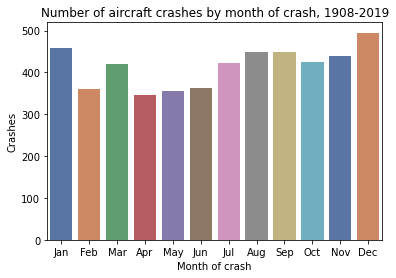

In [46]:
# Visualise the number of crashes and total fatalities
fig6_1 = sns.barplot(x='Month',y='Crashes',palette="deep",ci=None, data=crashes_by_month)
fig6_1.set_xticks(range(len(crashes_by_month)))
fig6_1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
fig6_1.set_xlabel('Month of crash')
fig6_1.set_title('Number of aircraft crashes by month of crash, 1908-2019')
fig6_1

<AxesSubplot:title={'center':'Figure 6 Total fatalities from accidents by month, 1908-2019'}, xlabel='Month of crash', ylabel='Total Fatalities'>

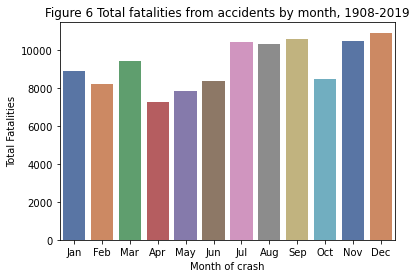

In [47]:
# Plot the total fatalities by month of crash
fig6_2 = sns.barplot(x='Month',y='Total Fatalities',palette="deep",ci=None, data=crashes_by_month)
fig6_2.set_xticks(range(len(crashes_by_month)))
fig6_2.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
fig6_2.set_xlabel('Month of crash')
fig6_2.set_title('Figure 6 Total fatalities from accidents by month, 1908-2019')
fig6_2

In [48]:
# Tabulate the number of crashes and sum total aboard and fatalities by year of crash
crashes_per_year = tabulate_data('Year')
crashes_per_year

,Year,Crashes,Total Aboard,Total Fatalities
0,1908,1,2.0,1.0
1,1909,1,1.0,1.0
2,1912,1,5.0,5.0
3,1913,3,51.0,45.0
4,1915,2,60.0,40.0
...,...,...,...,...
105,2016,23,903.0,515.0
106,2017,15,241.0,210.0
107,2018,16,1203.0,838.0
108,2019,13,432.0,305.0


Text(0.5, 1.0, 'Figure 7 Total fatalities from air crashes, 1908-2019')

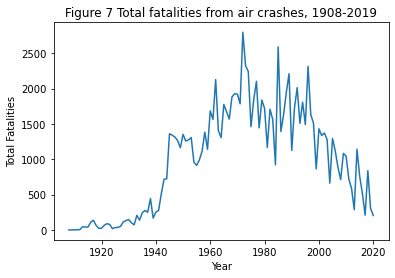

In [50]:
# Plot the fatalities over time
fig7_1=sns.lineplot(x=crashes_per_year['Year'],y=crashes_per_year['Total Fatalities'])
fig7_1.set_title('Figure 7 Total fatalities from air crashes, 1908-2019')

In [51]:
# Filter data for 1970 onwards
crashes_post1970 = crashes_per_year.loc[(crashes_per_year['Year']>=1970)&(crashes_per_year['Year'] <= 2017)]
crashes_post1970

,Year,Crashes,Total Aboard,Total Fatalities
59,1970,73,2618.000000,1920.0
60,1971,58,2422.000000,1784.0
61,1972,77,3471.000000,2796.0
62,1973,64,3325.000000,2323.0
63,1974,58,2878.000000,2242.0
64,1975,51,2167.000000,1460.0
65,1976,57,2487.000000,1842.0
66,1977,63,2640.000000,2102.0
67,1978,51,2586.000000,1444.0
68,1979,60,2324.000000,1838.0


In [52]:
# Read in the departures data
departures = pd.read_csv("departures_count_long.csv")
departures.head()

,Country Name,Year,Count
0,Afghanistan,1970,4000
1,Argentina,1970,71700
2,Australia,1970,283300
3,Austria,1970,14900
4,Belgium,1970,40800


In [53]:
# Sum the departures for each year
departs_per_year = departures[['Year','Count']].groupby(['Year']).sum()
departs_per_year.rename(columns = {'Count':'Departures'}, inplace = True)
departs_per_year.head()

,Departures
Year,
1970,9483400
1971,9538600
1972,9572500
1973,9792300
1974,9283700


In [54]:
# Read in the passengers data
passengers = pd.read_csv("passengers_count_long.csv")
passengers.head()

,Country Name,Year,Count
0,Afghanistan,1970,84700
1,Argentina,1970,2332000
2,Australia,1970,7318700
3,Austria,1970,511400
4,Belgium,1970,1366200


In [55]:
# Sum the passengers by year
passengers_per_year = passengers[['Year','Count']].groupby(['Year']).sum()
passengers_per_year.rename(columns = {'Count':'Passengers'}, inplace = True)
passengers_per_year.head()

,Passengers
Year,
1970,311098992
1971,332422904
1972,366478708
1973,402508700
1974,422271800


In [56]:
# Join the crash data with departures
crash_departs = crashes_post1970.merge(departs_per_year, left_on='Year', right_on='Year')
crash_departs

,Year,Crashes,Total Aboard,Total Fatalities,Departures
0,1970,73,2618.000000,1920.0,9483400
1,1971,58,2422.000000,1784.0,9538600
2,1972,77,3471.000000,2796.0,9572500
3,1973,64,3325.000000,2323.0,9792300
4,1974,58,2878.000000,2242.0,9283700
5,1975,51,2167.000000,1460.0,9290200
6,1976,57,2487.000000,1842.0,9623200
7,1977,63,2640.000000,2102.0,9971200
8,1978,51,2586.000000,1444.0,10237900
9,1979,60,2324.000000,1838.0,10725500


In [57]:
# Join the passengers data
yearly_data = crash_departs.merge(passengers_per_year, left_on='Year', right_on='Year')
yearly_data

,Year,Crashes,Total Aboard,Total Fatalities,Departures,Passengers
0,1970,73,2618.000000,1920.0,9483400,311098992
1,1971,58,2422.000000,1784.0,9538600,332422904
2,1972,77,3471.000000,2796.0,9572500,366478708
3,1973,64,3325.000000,2323.0,9792300,402508700
4,1974,58,2878.000000,2242.0,9283700,422271800
5,1975,51,2167.000000,1460.0,9290200,433856900
6,1976,57,2487.000000,1842.0,9623200,473518396
7,1977,63,2640.000000,2102.0,9971200,514836492
8,1978,51,2586.000000,1444.0,10237900,577689204
9,1979,60,2324.000000,1838.0,10725500,650396900


Text(0.5, 0.98, 'Figure 8 Total Fatalities and aircraft departures each year, 1970-2019')

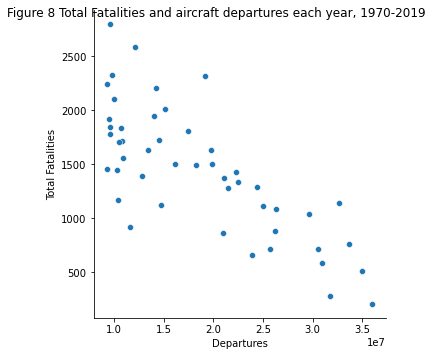

In [60]:
# Plot the relationship between Departures and fatalities
Fig8_1 = sns.relplot(x="Departures", y="Total Fatalities", data=yearly_data)
Fig8_1.fig.suptitle('Figure 8 Total Fatalities and aircraft departures each year, 1970-2019')

Text(0, 0.5, 'Global air passengers')

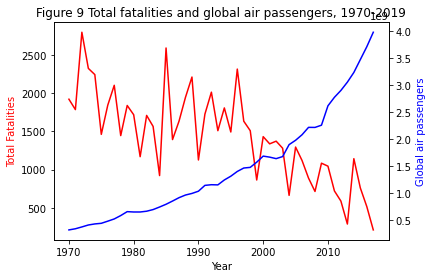

In [64]:
# Plot the series for total fatalities and total passengers over time
fig8_2a = sns.lineplot(x='Year',y='Total Fatalities',data=yearly_data, color="r")
ax2 = plt.twinx()
fig8_2b=sns.lineplot(x='Year',y='Passengers',data=yearly_data, color="b", ax=ax2)
fig8_2a.set_title('Figure 9 Total fatalities and global air passengers, 1970-2019')
fig8_2a.set_ylabel('Total Fatalities', color="r")
fig8_2b.set_ylabel('Global air passengers', color="b")


Text(0.5, 1.0, 'Fatalities and Aircraft departures, 1970-2019')

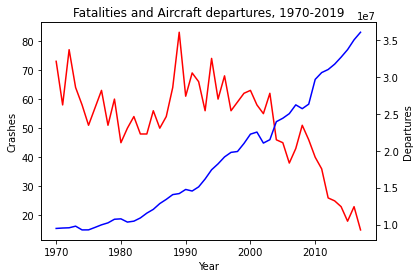

In [65]:
# Plot the series for total fatalities and total aircraft departures over time
fig8_3 = sns.lineplot(x='Year',y='Crashes',data=yearly_data, color="r")
ax2 = plt.twinx()
fig8_3 = sns.lineplot(x='Year',y='Departures',data=yearly_data, color="b", ax=ax2)
fig8_3.set_title('Fatalities and Aircraft departures, 1970-2019')

In [66]:
# Get Boeing stock price data from yfinance
ba_data = yf.download("BA", start="2002-01-02", end="2019-12-31",interval = "1d")
ba_data['Manufacturer'] = 'Boeing'
ba_data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Manufacturer
Date,,,,,,,
2002-01-02,38.540001,38.669998,37.849998,38.099998,25.237368,3545800,Boeing
2002-01-03,38.400002,39.000000,38.320000,38.750000,25.667923,3491900,Boeing
2002-01-04,39.650002,40.400002,39.419998,40.360001,26.734388,4081100,Boeing
2002-01-07,41.000000,41.889999,40.919998,41.000000,27.158331,6111900,Boeing
2002-01-08,41.470001,41.700001,40.020000,40.330002,26.714531,4211000,Boeing


In [67]:
# Get Airbus stock price data from yfinance
airbus_data = yf.download('AIR.PA',start="2002-01-02", end="2019-12-31", interval = "1d")
airbus_data['Manufacturer'] = 'Airbus'
airbus_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Manufacturer
Date,,,,,,,
2002-01-02,13.80,13.97,13.52,13.52,9.119587,367495,Airbus
2002-01-03,13.88,13.95,13.43,13.89,9.369160,987604,Airbus
2002-01-04,13.50,14.14,13.50,14.14,9.537790,1545519,Airbus
2002-01-07,14.14,14.28,13.83,14.19,9.571517,878195,Airbus
2002-01-08,14.16,14.90,13.95,14.80,9.982978,2163046,Airbus


In [68]:
# Concatenate both datasets and calculate the percentage change in daily stock price
fin_data = pd.concat([ba_data,airbus_data])
fin_data['per_chg'] = (fin_data['Close']-fin_data['Open'])/fin_data['Open']*100
fin_data.head()

,Open,High,Low,Close,Adj Close,Volume,Manufacturer,per_chg
Date,,,,,,,,
2002-01-02,38.540001,38.669998,37.849998,38.099998,25.237368,3545800,Boeing,-1.141677
2002-01-03,38.400002,39.000000,38.320000,38.750000,25.667923,3491900,Boeing,0.911454
2002-01-04,39.650002,40.400002,39.419998,40.360001,26.734388,4081100,Boeing,1.790666
2002-01-07,41.000000,41.889999,40.919998,41.000000,27.158331,6111900,Boeing,0.000000
2002-01-08,41.470001,41.700001,40.020000,40.330002,26.714531,4211000,Boeing,-2.748974


In [69]:
# Filter Aircrash data for Boeing and Airbus post 2002
ba_air_crash = air_crash_data.loc[(air_crash_data['Year'] >= 2002) & air_crash_data['Manufacturer'].isin(['Boeing','Airbus'])]
ba_air_crash

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn / ln,Total Aboard,...,Crew Fatalities,Ground,Summary,datetime,Day,Month,Year,WeekDay,Manufacturer,fatal_on_board
4362,"January 16, 2002",16:29,"Near Solo, Indonesia",Garuda Indonesia Airlines,421,Mataram - Yogyakarta - Jakarta,Boeing B-737-3Q8,PK-GWA,24403/1706,62.0,...,1.0,0.0,The aircraft suffered a flame out of both engi...,2002-01-16,16,1,2002,2,Boeing,1.6
4365,"January 28, 2002",11:00,"Near Ipiales, Colombia",TAME,120,Quito - Tulcán - Cali,Boeing B-727-134,HC-BLF,19692/498,92.0,...,9.0,0.0,"The airliner crashed into the fogbound 15,721 ...",2002-01-28,28,1,2002,0,Boeing,100.0
4374,"April 15, 2002",11:23,"Busan, South Korea",Air China,129,Beijing - Busan,Boeing B-767-200ER,B-2552,23308/127,166.0,...,8.0,0.0,"The aircraft crashed onto a mountain, in fog, ...",2002-04-15,15,4,2002,0,Boeing,77.1
4378,"May 07, 2002",15:17,"Near Tunis, Tunisia",EgyptAir,843,Cairo - Tunis,Boeing B-737-566,SU-GBI,25307/2135,62.0,...,3.0,0.0,"The jet airliner crashed into a hillside, 4 mi...",2002-05-07,7,5,2002,1,Boeing,22.6
4381,"May 25, 2002",15:29,"Off Penghu Island, Taiwan",China Airlines (Taiwan),611,Taipei - Hong Kong,Boeing B-747-209B,B-18255,21843/386,225.0,...,19.0,0.0,"The flight crashed into the sea, 31 miles NE o...",2002-05-25,25,5,2002,5,Boeing,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,"January 14, 2019",08:30,"Karaj, Iran",Saha Air,Unknown Flight #,Bishkek - Payam,Boeing 707-3J9C,EP-CPP,21128/917,16.0,...,2.0,0.0,The cargo plane was operated by the Iranian Ai...,2019-01-14,14,1,2019,0,Boeing,93.8
4967,"February 23, 2019",12:45,"Houston, Texas",Atlas Air serving Amazon,3591,Miami - Houston,Boeing 767-375ER,N1217A,25865,3.0,...,3.0,0.0,ATC lost radar contact with the cargo jet when...,2019-02-23,23,2,2019,5,Boeing,100.0
4969,"March 10, 2019",08:44,"Bishoftu, Ethiopia",Ethiopian Airlines,302,Addis Ababa - Nairobi,Boeing 737 Max 8,ET-AVJ,63450/7243,157.0,...,8.0,0.0,The internationally scheduled airliner crashed...,2019-03-10,10,3,2019,6,Boeing,100.0
4980,"January 08, 2020",06:18,"Near Shahriah, Iran",Ukraine International Airlines,PS752,Tehran - Kiev,Boeing 737-8KV WL,UR-PSR,38124/5977,176.0,...,9.0,0.0,The plane took off from Tehran International A...,2020-01-08,8,1,2020,2,Boeing,100.0


In [70]:
# Join the passengers data
price_crash_data = ba_air_crash.merge(fin_data, left_on=['datetime','Manufacturer'], right_on=['Date','Manufacturer'])
price_crash_data

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn / ln,Total Aboard,...,WeekDay,Manufacturer,fatal_on_board,Open,High,Low,Close,Adj Close,Volume,per_chg
0,"January 16, 2002",16:29,"Near Solo, Indonesia",Garuda Indonesia Airlines,421,Mataram - Yogyakarta - Jakarta,Boeing B-737-3Q8,PK-GWA,24403/1706,62.0,...,2,Boeing,1.6,38.650002,39.099998,38.020000,38.020000,25.184374,3783300,-1.630016
1,"January 28, 2002",11:00,"Near Ipiales, Colombia",TAME,120,Quito - Tulcán - Cali,Boeing B-727-134,HC-BLF,19692/498,92.0,...,0,Boeing,100.0,40.720001,41.000000,40.340000,40.900002,27.092081,2010200,0.442044
2,"April 15, 2002",11:23,"Busan, South Korea",Air China,129,Beijing - Busan,Boeing B-767-200ER,B-2552,23308/127,166.0,...,0,Boeing,77.1,48.200001,48.450001,47.529999,47.650002,31.695021,2017800,-1.141077
3,"May 07, 2002",15:17,"Near Tunis, Tunisia",EgyptAir,843,Cairo - Tunis,Boeing B-737-566,SU-GBI,25307/2135,62.0,...,1,Boeing,22.6,43.599998,43.849998,42.799999,43.139999,28.695122,3633700,-1.055044
4,"March 06, 2003",15:45,"Tamanrasset, Algeria",Air Algerie,6289,Tamanrasset - Algiers,Boeing B-737-2T4,7T-VEZ,22700/885,103.0,...,3,Boeing,99.0,26.600000,26.700001,26.000000,26.160000,17.737309,4497700,-1.654137
5,"July 08, 2003",04:00,"Port Sudan, Sudan",Sudan Airways,139,Port Sudan - Khartoum,Boeing 737-2J8C,ST-AFK,21169/429,117.0,...,1,Boeing,100.0,35.119999,35.200001,34.380001,34.990002,23.861603,3123500,-0.370152
6,"October 14, 2004",03:56,"Halifax, Nova Scotia, Canada",MK Airlines,1602,"Windsor Locks - Halifax - Zaragoza, Spain",Boeing 747-244B-SF,9G-MKJ,22170,7.0,...,3,Boeing,100.0,50.150002,51.000000,50.150002,50.250000,35.039738,3048600,0.199399
7,"February 03, 2005",17:00,"Near Kabul, Afghanistan",Kam Air,904,Herat - Kabul,Boeing B-737-200,EX-037,22075/630,104.0,...,3,Boeing,100.0,52.950001,52.950001,51.939999,52.000000,36.399849,4199200,-1.794147
8,"April 20, 2005",22:15,"Tehran, Iran",Saha Airline Services,Unknown Flight #,Krish - Teran,Boeing B-707-3J9C,EP-SHE,21127/915,169.0,...,2,Boeing,1.8,58.099998,58.369999,57.230000,57.230000,40.248901,3940900,-1.497416
9,"August 02, 2005",16:04,"Toronto, Canada",Air France,358,"Paris, France - Toronto Canada",Airbus A-340,F-GLZQ,289,309.0,...,1,Airbus,0.0,27.590000,27.850000,27.500000,27.700001,21.185553,1199943,0.398697


Text(0.5, 1.0, 'Figure 10 Total fatalities and the stock price change by aircraft manufacturer, 2002-2019')

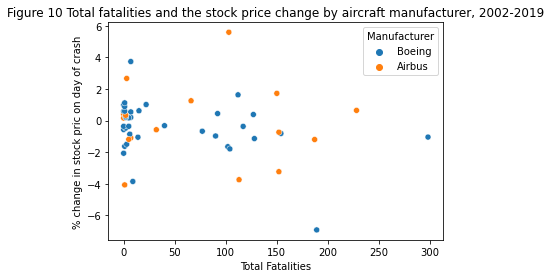

In [71]:
# PLot the relationship between Total Fatalities and those on Board
Fig9_1=sns.scatterplot(x="Total Fatalities", y="per_chg",hue="Manufacturer", data=price_crash_data)
Fig9_1.set_ylabel('% change in stock pric on day of crash')
Fig9_1.set_title('Figure 10 Total fatalities and the stock price change by aircraft manufacturer, 2002-2019')

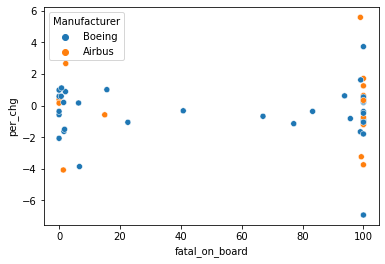

In [73]:
# PLot the relationship between Total Fatalities and those on Board
fig9_2 = sns.scatterplot(x="fatal_on_board", y="per_chg",hue="Manufacturer", data=price_crash_data)